In [1]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [3]:


class DecisionTreeCollaborativeFiltering:
    def __init__(self, customer_data_path, product_data_path, rating_data_path):
        self.customer_data_path = customer_data_path
        self.product_data_path = product_data_path
        self.rating_data_path = rating_data_path

    def load_data(self):
        with open(self.customer_data_path, 'r') as file:
            self.customer_data = json.load(file)

        with open(self.product_data_path, 'r') as file:
            self.product_data = json.load(file)

        with open(self.rating_data_path, 'r') as file:
            self.rating_data = json.load(file)

    def preprocess_data(self):
        customers_df = pd.DataFrame(self.customer_data)
        products_df = pd.DataFrame(self.product_data)
        ratings_df = pd.DataFrame(self.rating_data)
        customers_df.rename(columns={'Id': 'CustomerID'}, inplace=True)
        products_df.rename(columns={'Id': 'ProductID'}, inplace=True)
        user_item_ratings = pd.merge(ratings_df, customers_df, on='CustomerID')
        user_item_ratings = pd.merge(user_item_ratings, products_df, on='ProductID')
        # Encode categorical features like 'age' and 'region'
        label_encoder = LabelEncoder()
        user_item_ratings['Age'] = label_encoder.fit_transform(user_item_ratings['Age'])
        user_item_ratings['Region'] = label_encoder.fit_transform(user_item_ratings['Region'])
        user_item_ratings['Category'] = label_encoder.fit_transform(user_item_ratings['Category'])
        user_item_ratings['genre'] = label_encoder.fit_transform(user_item_ratings['genre'])
        X = user_item_ratings[['Age', 'Region', 'Category','genre']]
        y = user_item_ratings['Rate']

        #X = pd.get_dummies(X, columns=['region', 'category'], drop_first=True)

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    def train_model(self):
        self.clf = DecisionTreeClassifier()
        self.clf.fit(self.X_train, self.y_train)

    def evaluate_model(self):
        y_pred = self.clf.predict(self.X_test)

        self.accuracy = accuracy_score(self.y_test, y_pred)
        self.recall = recall_score(self.y_test, y_pred, average='weighted')
        self.f1 = f1_score(self.y_test, y_pred, average='weighted')

        self.cm = confusion_matrix(self.y_test, y_pred)

    def plot_confusion_matrix(self):
        plt.figure(figsize=(8, 6))
        sns.heatmap(self.cm, annot=True, fmt="d", cmap="Blues")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

    def save_results(self, output_path):
        with open(output_path, 'w') as file:
            file.write(f'Accuracy: {self.accuracy}\n')
            file.write(f'Recall: {self.recall}\n')
            file.write(f'F1-Score: {self.f1}\n')
            
            file.write(str(self.cm))

    def run(self, output_path):
        self.load_data()
        self.preprocess_data()
        self.train_model()
        self.evaluate_model()
        self.plot_confusion_matrix()
        self.save_results(output_path)

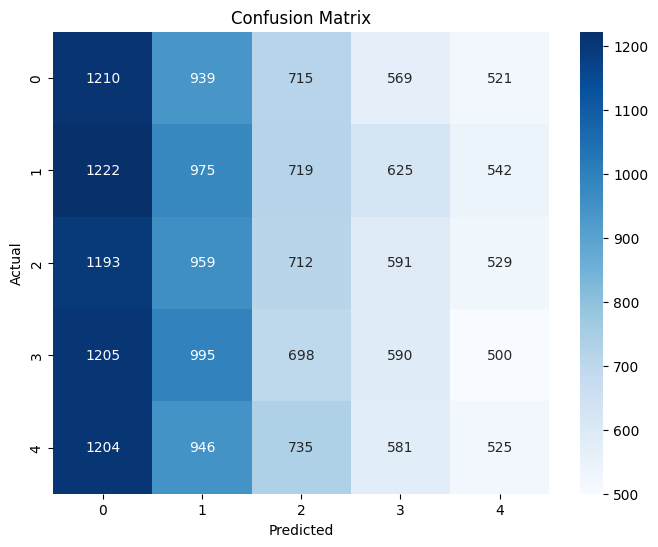

In [4]:
recommender = DecisionTreeCollaborativeFiltering('input/dataset/customers.json', 'input/dataset/products.json', 'input/dataset/ratings.json')
recommender.run('recommendation_results.txt')